In [ ]:
import main
import pandas as pd
import networkx as nx
from EmergencyUnit import EmergencyUnit

city = main.configure_city()
units = EmergencyUnit.response_buildings
unit_locs = [unit.location for unit in units]
emergency_unit_labels = dict()
pos=dict()
node_coordinates=list(city.city_graph.nodes)
width = city.width
height = city.height
dim = city.zone_dimension
for i in range(len(node_coordinates)):
    pos[node_coordinates[i]]=(node_coordinates[i][1], (height*dim-1)-node_coordinates[i][0])
    if node_coordinates[i] in unit_locs:
        emergency_unit_labels[node_coordinates[i]] = 'Emergency Unit'
traffic_time_labels = nx.get_edge_attributes(city.city_graph,'adjusted_time')
nx.draw(city.city_graph, pos)
nx.draw_networkx_edge_labels(city.city_graph,pos,edge_labels=traffic_time_labels)
nx.draw_networkx_labels(city.city_graph, pos, emergency_unit_labels, font_size=10, font_color='r')

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:31<00:00,  1.10it/s]


{(1, 2): Text(2, 1, 'Emergency Unit'), (2, 5): Text(5, 0, 'Emergency Unit')}

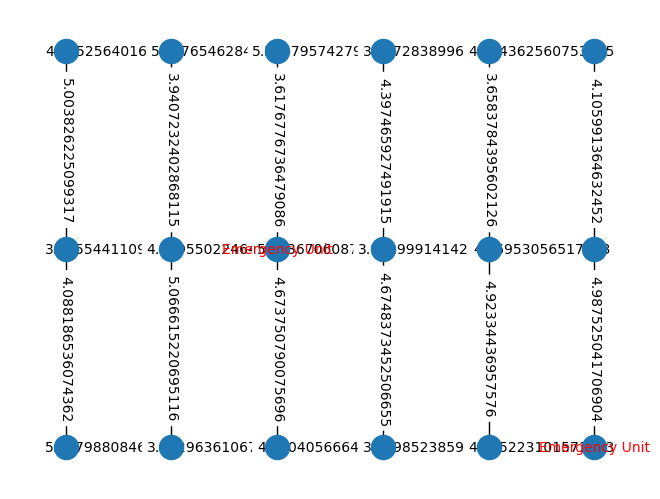

In [2]:
resp_times, successful_perc = main.simulate(city)
traffic_time_labels = nx.get_edge_attributes(city.city_graph,'adjusted_time')
nx.draw(city.city_graph, pos)
nx.draw_networkx_edge_labels(city.city_graph,pos,edge_labels=traffic_time_labels)
nx.draw_networkx_labels(city.city_graph, pos, emergency_unit_labels, font_size=10, font_color='r')

<AxesSubplot: >

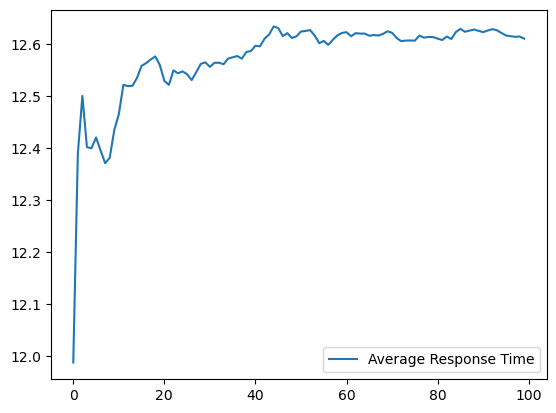

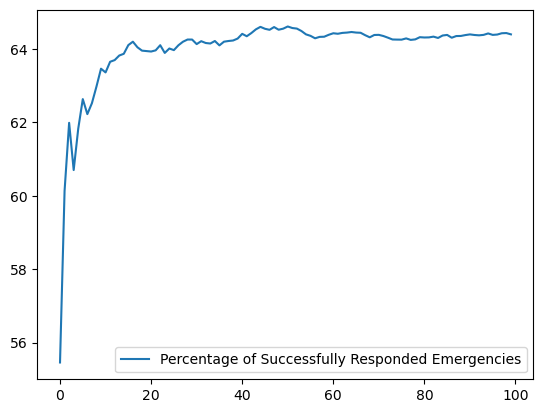

In [3]:
df1 = pd.DataFrame({'Average Response Time': resp_times})
df1.plot()
df2 = pd.DataFrame({'Percentage of Successfully Responded Emergencies': successful_perc})
df2.plot()